In [78]:
import numpy as np
import matplotlib as plt
import pandas as pd
import sklearn as sklearn
%matplotlib inline

In [45]:
df = pd.read_csv('Kickstartercombo.csv')

In [4]:
df.head()

,Unnamed: 0,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real
0,0,1000002330,The Songs of Adelaide & Abullah,Publishing,Poetry,GB,failed,1000.0,0.0,GBP,2015-08-11 12:12:00,2015-10-09 11:36:00,0,0.0,NaN,NaN
1,1,1000004038,Where is Hank?,Film & Video,Narrative Film,US,failed,45000.0,220.0,USD,2013-01-12 00:20:00,2013-02-26 00:20:00,3,220.0,NaN,NaN
2,2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,failed,5000.0,1.0,USD,2012-03-17 03:24:00,2012-04-16 04:24:00,1,1.0,NaN,NaN
3,3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,US,canceled,19500.0,1283.0,USD,2015-07-04 08:35:00,2015-08-29 01:00:00,14,1283.0,NaN,NaN
4,4,1000014025,Monarch Espresso Bar,Food,Restaurants,US,successful,50000.0,52375.0,USD,2016-02-26 13:38:00,2016-04-01 13:38:00,224,52375.0,NaN,NaN


In [5]:
df.shape

(702411, 16)

In [6]:
df.columns

Index(['Unnamed: 0', 'ID', 'name', 'main_category', 'category', 'country',
       'state', 'goal', 'pledged', 'currency', 'launched', 'deadline',
       'backers', 'usd pledged', 'usd_goal_real', 'usd_pledged_real'],
      dtype='object')

In [46]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [10]:
df.head()

,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real
0,1000002330,The Songs of Adelaide & Abullah,Publishing,Poetry,GB,failed,1000.0,0.0,GBP,2015-08-11 12:12:00,2015-10-09 11:36:00,0,0.0,NaN,NaN
1,1000004038,Where is Hank?,Film & Video,Narrative Film,US,failed,45000.0,220.0,USD,2013-01-12 00:20:00,2013-02-26 00:20:00,3,220.0,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,failed,5000.0,1.0,USD,2012-03-17 03:24:00,2012-04-16 04:24:00,1,1.0,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,US,canceled,19500.0,1283.0,USD,2015-07-04 08:35:00,2015-08-29 01:00:00,14,1283.0,NaN,NaN
4,1000014025,Monarch Espresso Bar,Food,Restaurants,US,successful,50000.0,52375.0,USD,2016-02-26 13:38:00,2016-04-01 13:38:00,224,52375.0,NaN,NaN


In [11]:
df.isnull().sum()

ID                       0
name                     8
main_category            0
category                 0
country                  0
state                    0
goal                     0
pledged                  0
currency                 0
launched                 0
deadline                 0
backers                  0
usd pledged           7594
usd_goal_real       323750
usd_pledged_real    323750
dtype: int64

In [47]:
df.loc[df['state'] == 'canceled']

,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,US,canceled,19500.0,1283.00,USD,2015-07-04 08:35:00,2015-08-29 01:00:00,14,1283.000000,NaN,NaN
7,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Design,Product Design,US,canceled,125000.0,8233.00,USD,2014-04-24 18:14:00,2014-05-29 18:14:00,58,8233.000000,NaN,NaN
8,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Film & Video,Documentary,US,canceled,65000.0,6240.57,USD,2014-07-11 21:55:00,2014-08-10 21:55:00,43,6240.570000,NaN,NaN
59,1000256760,"Raise the Woof, expanding the love (Canceled)",Design,Design,CA,canceled,15000.0,700.00,CAD,2015-07-08 21:46:00,2015-08-07 21:46:00,6,553.324254,NaN,NaN
61,1000260691,Gizbee Unlimited Removable Storage for Your T...,Technology,Gadgets,US,canceled,87000.0,2030.00,USD,2016-02-29 20:30:00,2016-03-25 19:30:00,15,2030.000000,NaN,NaN
64,1000278154,"Loot and Recruit - A quirky, combative, deck b...",Games,Tabletop Games,US,canceled,13000.0,2453.00,USD,2015-03-10 13:19:00,2015-04-10 05:59:00,65,2453.000000,NaN,NaN
65,1000282287,Babe Ruth's Family Kitchen - Gourmet Hot Dogs ...,Food,Food,US,canceled,25000.0,0.00,USD,2015-09-08 00:59:00,2015-10-13 00:59:00,0,0.000000,NaN,NaN
83,10003650,Glyscian Debut Album Recording (Canceled),Music,Rock,US,canceled,15000.0,151.00,USD,2012-03-27 04:25:00,2012-05-26 04:25:00,4,151.000000,NaN,NaN
94,1000427280,Fishtacular - The Ultimate Fishing Tool (Cance...,Technology,Apps,CA,canceled,50000.0,11336.00,CAD,2015-04-23 20:04:00,2015-05-25 20:04:00,19,9240.736853,NaN,NaN
164,1000767040,Strait Jacket  Tangle Prevention For Headphones,Design,Product Design,US,canceled,30000.0,1041.00,USD,2016-10-24 03:35:00,2016-11-23 03:35:00,46,549.000000,NaN,NaN


In [16]:
df.loc[df['state'] == 'successful']

,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real
4,1000014025,Monarch Espresso Bar,Food,Restaurants,US,successful,50000.0,52375.00,USD,2016-02-26 13:38:00,2016-04-01 13:38:00,224,52375.000000,NaN,NaN
5,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,US,successful,1000.0,1205.00,USD,2014-12-01 18:30:00,2014-12-21 18:30:00,16,1205.000000,NaN,NaN
10,100005484,Lisa Lim New CD!,Music,Indie Rock,US,successful,12500.0,12700.00,USD,2013-03-09 06:42:00,2013-04-08 06:42:00,100,12700.000000,NaN,NaN
16,1000070642,Mike Corey's Darkness & Light Album,Music,Music,US,successful,250.0,250.00,USD,2012-08-02 14:11:00,2012-08-17 14:11:00,7,250.000000,NaN,NaN
18,1000072011,CMUK. Shoes: Take on Life Feet First.,Fashion,Fashion,US,successful,20000.0,34268.00,USD,2013-11-25 07:06:00,2013-12-30 07:06:00,624,34268.000000,NaN,NaN
21,1000091520,The Book Zoo - A Mini-Comic,Comics,Comics,US,successful,175.0,701.66,USD,2014-10-23 17:15:00,2014-11-12 17:15:00,66,701.660000,NaN,NaN
22,1000102741,Matt Cavenaugh & Jenny Powers make their 1st a...,Music,Music,US,successful,10000.0,15827.00,USD,2010-12-07 23:16:00,2011-01-06 23:16:00,147,15827.000000,NaN,NaN
24,1000104688,Permaculture Skills,Film & Video,Webseries,CA,successful,17757.0,48905.00,CAD,2014-11-14 18:02:00,2014-12-14 18:02:00,571,43203.251140,NaN,NaN
25,1000104953,Rebel Army Origins: The Heroic Story Of Major ...,Comics,Comics,GB,successful,100.0,112.38,GBP,2015-12-29 16:59:00,2016-01-28 16:59:00,27,167.700306,NaN,NaN
27,1000117861,Ledr workbook: one tough journal!,Design,Product Design,US,successful,1000.0,47266.00,USD,2016-09-07 13:14:00,2016-10-08 02:00:00,549,11253.000000,NaN,NaN


In [17]:
df.loc[df['currency'] != 'USD']

,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real
0,1000002330,The Songs of Adelaide & Abullah,Publishing,Poetry,GB,failed,1000.0,0.00,GBP,2015-08-11 12:12:00,2015-10-09 11:36:00,0,0.000000,NaN,NaN
9,100004721,Of Jesus and Madmen,Publishing,Nonfiction,CA,failed,2500.0,0.00,CAD,2013-09-09 18:19:00,2013-10-09 18:19:00,0,0.000000,NaN,NaN
20,1000087442,Mountain brew: A quest for alcohol sustainability,Food,Drinks,NO,failed,500.0,48.00,NOK,2015-01-26 19:17:00,2015-02-25 19:17:00,3,6.180008,NaN,NaN
23,1000103948,Superhero Teddy Bear,Crafts,DIY,GB,failed,12000.0,0.00,GBP,2015-12-06 20:09:00,2016-01-05 20:09:00,0,0.000000,NaN,NaN
24,1000104688,Permaculture Skills,Film & Video,Webseries,CA,successful,17757.0,48905.00,CAD,2014-11-14 18:02:00,2014-12-14 18:02:00,571,43203.251140,NaN,NaN
25,1000104953,Rebel Army Origins: The Heroic Story Of Major ...,Comics,Comics,GB,successful,100.0,112.38,GBP,2015-12-29 16:59:00,2016-01-28 16:59:00,27,167.700306,NaN,NaN
26,1000115172,Daily Brew Coffee,Food,Food Trucks,GB,failed,3500.0,21.00,GBP,2015-03-01 18:06:00,2015-03-31 18:06:00,1,32.415261,NaN,NaN
28,1000120151,Feather Cast Furled Fly Fishing Leaders,Design,Product Design,AU,successful,2000.0,2000.00,AUD,2015-07-23 03:09:00,2015-08-22 03:09:00,18,1473.618900,NaN,NaN
53,1000234595,Fashion removeable decoration jewel accessory ...,Fashion,Accessories,IT,failed,12000.0,137.00,EUR,2016-09-13 11:59:00,2016-10-13 11:59:00,2,0.000000,NaN,NaN
57,1000245024,Safer Home,Technology,Hardware,CA,failed,50000.0,0.00,CAD,2015-06-03 05:52:00,2015-07-03 05:52:00,0,0.000000,NaN,NaN


In [22]:
df.loc[df['usd pledged'].isnull()]

,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real
150,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,"N,""0",undefined,6500.0,555.00,USD,2014-08-06 21:28:00,2014-09-20 06:59:00,0,NaN,NaN,NaN
287,100149523,Duncan Woods - Chameleon EP,Music,Music,"N,""0",undefined,4500.0,4767.00,AUD,2015-08-04 12:05:00,2015-08-25 23:00:00,0,NaN,NaN,NaN
549,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,"N,""0",undefined,3500.0,3576.00,USD,2015-03-10 20:06:00,2015-04-09 21:06:00,0,NaN,NaN,NaN
561,1003130892,Butter Side Down Debut Album,Music,Music,"N,""0",undefined,6000.0,7007.80,USD,2015-11-02 22:09:00,2015-11-26 10:59:00,0,NaN,NaN,NaN
650,1003629045,Chase Goehring debut EP,Music,Music,"N,""0",undefined,3000.0,3660.38,USD,2016-02-23 03:09:00,2016-03-21 06:00:00,0,NaN,NaN,NaN
714,1004013077,Spencer Capier Instrumental Project 2015,Music,Music,"N,""0",undefined,4000.0,4760.00,CAD,2014-09-10 22:51:00,2014-10-10 22:51:00,0,NaN,NaN,NaN
730,1004126342,LUKAS LIGETI'S 50TH BIRTHDAY FESTIVAL: ORIGINA...,Music,Music,"N,""0",undefined,5000.0,6370.00,USD,2015-05-15 02:12:00,2015-06-11 04:00:00,0,NaN,NaN,NaN
747,1004255433,The Battle For Breukelen: A Neighborhood Epic,Film & Video,Film & Video,"N,""0",undefined,6000.0,6695.00,USD,2015-10-10 18:45:00,2015-11-07 08:59:00,0,NaN,NaN,NaN
751,1004298993,"""Tamboura Plays Violin"" - a collection of Pop ...",Music,Music,"N,""0",undefined,2750.0,2926.00,USD,2015-02-11 19:28:00,2015-03-28 18:28:00,0,NaN,NaN,NaN
765,1004402863,Nightingale Noel - An A Cappella Holiday CD,Music,Music,"N,""0",undefined,1200.0,1585.00,USD,2015-11-11 21:02:00,2015-12-11 21:02:00,0,NaN,NaN,NaN


In [28]:
len(df['main_category'].unique())

16

In [29]:
df['main_category'].unique().unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism', 'Graphic Novels'], dtype=object)

In [48]:
df = df.loc[df['main_category']=='Crafts']

In [49]:
df.drop(['ID', 'name', 'category','country','state','currency', 'launched', 'deadline', 'usd_goal_real', 'usd_pledged_real', 'main_category'], axis=1, inplace=True)

In [50]:
df.head()

,goal,pledged,backers,usd pledged
11,5000.0,0.0,0,0.000000
23,12000.0,0.0,0,0.000000
60,5000.0,2.0,1,2.975225
198,7000.0,0.0,0,0.000000
259,250.0,1009.0,39,734.389672


In [51]:
df.drop(['usd pledged'], axis=1, inplace=True)

In [52]:
df.head()

,goal,pledged,backers
11,5000.0,0.0,0
23,12000.0,0.0,0
60,5000.0,2.0,1
198,7000.0,0.0,0
259,250.0,1009.0,39


In [53]:
df.describe()

,goal,pledged,backers
count,1.600100e+04,1.600100e+04,16001.000000
mean,1.164655e+04,1.847953e+03,27.120680
std,1.237923e+05,1.339987e+04,169.494147
min,1.000000e+00,0.000000e+00,0.000000
25%,6.500000e+02,4.000000e+00,1.000000
50%,2.200000e+03,9.000000e+01,3.000000
75%,6.950000e+03,6.890000e+02,16.000000
max,1.000000e+07,1.039589e+06,12705.000000


In [54]:
df.isnull().sum()

goal       0
pledged    0
backers    0
dtype: int64

In [56]:
df.loc[df.duplicated()]

,goal,pledged,backers
746,2000.0,0.0,0
1083,200.0,0.0,0
1533,500.0,0.0,0
1546,5000.0,0.0,0
2073,2000.0,0.0,0
2193,5000.0,0.0,0
2797,1000.0,0.0,0
3270,5000.0,0.0,0
3310,500.0,0.0,0
4448,5000.0,0.0,0


In [59]:
df = df.drop_duplicates()

In [60]:
df.shape

(6504, 3)

In [61]:
df.describe()

,goal,pledged,backers
count,6.504000e+03,6.504000e+03,6504.000000
mean,1.287683e+04,2.804503e+03,37.027983
std,1.372883e+05,1.918185e+04,191.818233
min,1.000000e+00,0.000000e+00,0.000000
25%,6.000000e+02,5.700000e+01,3.000000
50%,2.343500e+03,2.750000e+02,7.000000
75%,7.000000e+03,1.375000e+03,26.000000
max,1.000000e+07,1.039589e+06,12705.000000


In [62]:
import seaborn as sns

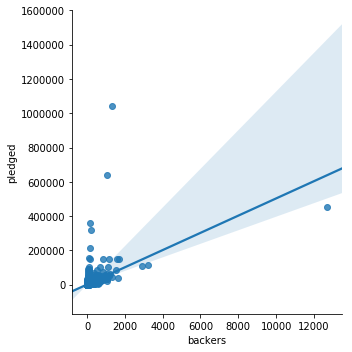

In [65]:
sns.lmplot(x='backers', y='pledged', data=df)

In [66]:
meanpledged = df['pledged'].mean()
stdpledged = df['pledged'].std()
toprange = meanpledged + stdpledged * 1.96
botrange = meanpledged - stdpledged * 1.96

copydf = df #because we don't want to mess up the original df
copydf = copydf.drop(copydf[copydf['pledged'] > toprange].index)
copydf = copydf.drop(copydf[copydf['pledged'] < botrange].index)

copydf.head()

,goal,pledged,backers
11,5000.0,0.0,0
23,12000.0,0.0,0
60,5000.0,2.0,1
198,7000.0,0.0,0
259,250.0,1009.0,39


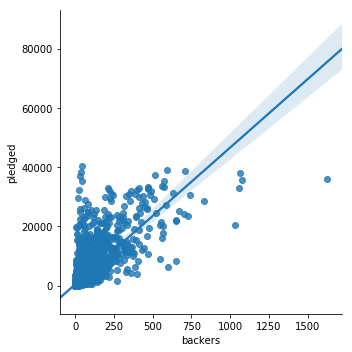

In [68]:
sns.lmplot(x='backers', y='pledged', data=copydf)

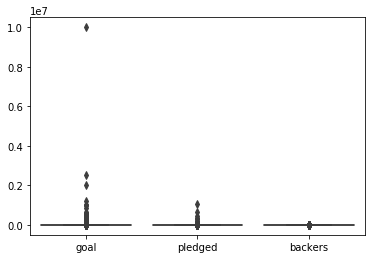

In [69]:
sns.boxplot(data=df)

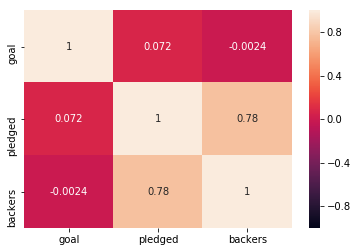

In [70]:
corr = copydf.corr()
sns.heatmap(corr, vmin=-1, annot=True)

## Linear Regression

In [83]:
from sklearn.linear_model import LinearRegression
#X = copydf.drop('pledged', axis=1) - ran first time

X = copydf.drop('goal', axis=1)
#assign linear regression function to a variable
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [84]:
lm.fit(X, copydf.pledged)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [85]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 4.77484718431e-12


In [86]:
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 2


In [87]:
X_train = X[:-50]
X_test = X[-50:]
Y_train = copydf.pledged[:-50]
Y_test = copydf.pledged[-50:]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6401, 2)
(50, 2)
(6401,)
(50,)


In [88]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, copydf.pledged, test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4322, 2)
(2129, 2)
(4322,)
(2129,)


In [89]:
lm=LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [90]:
print ('Fit a model X_train, and calculate MSE with Y_train:', np.mean((Y_train - lm.predict(X_train)) ** 2))
print ('Fit a model X_train, and calculate MSE with X_test, Y_test:', np.mean((Y_test - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 1.1842608471917217e-22
Fit a model X_train, and calculate MSE with X_test, Y_test: 1.0614125109898372e-22
